In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
np.random.seed(42)

#### Importando a lista de parâmetros

In [3]:
param_runs = []
with open('ContasRbCs.csv','r') as csv_file:
    file = csv.reader(csv_file)
    count = 0
    for row in file:
        if count == 0:
            count +=1
        else:
            param_runs.append([float(n) for n in row])

In [4]:
param_runs

[[0.08, 0.54, 0.041, 0.096],
 [0.2, 0.72, 0.074, 0.082],
 [0.34, 0.92, 0.109, 0.071],
 [0.4, 1.0, 0.117, 0.085],
 [0.43, 1.06, 0.119, 0.09],
 [0.55, 1.42, 0.133, 0.096],
 [0.56, 1.27, 0.129, 0.095],
 [0.56, 1.06, 0.13, 0.084],
 [0.55, 0.94, 0.134, 0.108]]

#### Visualização

In [5]:
class MOT():
    
    def __init__(self,L,g,b,w):
        self.loading_rate = L
        self.gamma = g
        self.b = b
        self.gaussian_width = w
        self.measurement_times = np.array([])
        self.measurements = np.array([])
        self.noisy_measurements = np.array([])
        
    def _a(self):
        return self.gamma
    
    def _b(self):
        return self.b
    
    def N(self,t):
        a = self._a()
        b = self._b()
        D = np.sqrt(a**2 + 4*self.loading_rate*b)
        return D/(2*b)*np.tanh(D*t/2 + np.arctanh(a/D)) - a/(2*b)
    
    def load_MOT(self,dt,endtime):
        self.measurement_times = np.arange(0,endtime,dt)
        self.measurements = np.array([[t,self.N(t)] for t in self.measurement_times])
        return None
    
    def measure_loading(self):
        nom = len(self.measurements)
        self.noise = np.array([[0,(np.random.random()-0.5)*(10e-3*np.random.random())] for i in list(range(nom))])
        self.noisy_measurements = self.measurements + self.noise
        return None
                            
    def return_loading_curve(self):
        plt.scatter(self.noisy_measurements[:,0],self.noisy_measurements[:,1],s=10,alpha=0.01)
        return self.noisy_measurements

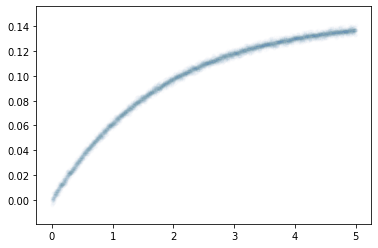

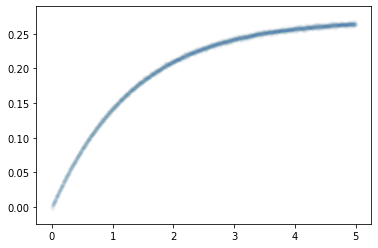

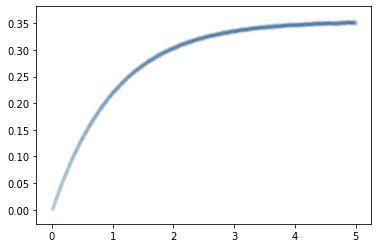

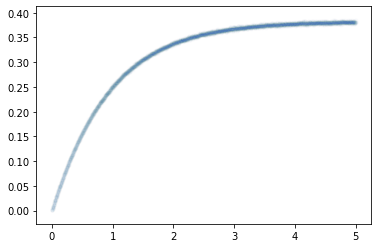

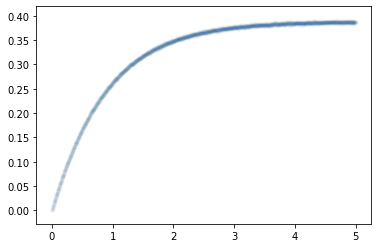

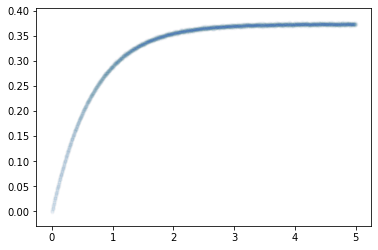

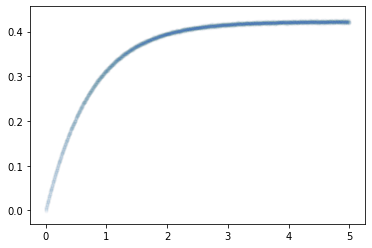

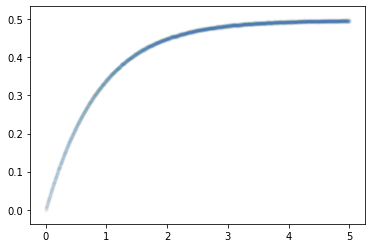

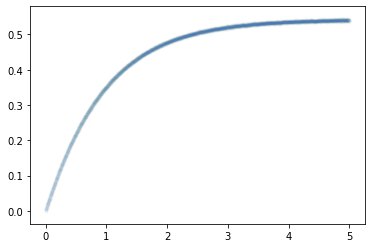

In [6]:
for i in range(9):
    MOTi = MOT(*param_runs[i])
    MOTi.load_MOT(0.001,5)
    MOTi.measure_loading()
    loading_curve = MOTi.return_loading_curve()
    plt.show()

In [7]:
MOT1 = MOT(*param_runs[0])


In [8]:
MOT1.load_MOT(0.01,10)

In [9]:
MOT1.measure_loading()

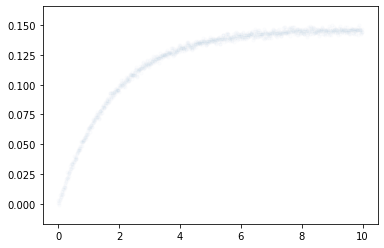

In [10]:
loading_curve = MOT1.return_loading_curve()
plt.show()

In [11]:
data = MOT1.noisy_measurements

In [12]:
rescaled_data = data * [1/np.float64(15.03/1320),1]
rescaled_data

array([[ 0.00000000e+00,  3.42148393e-03],
       [ 8.78243513e-01,  5.16116726e-04],
       [ 1.75648703e+00, -1.12801458e-03],
       ...,
       [ 8.75608782e+02,  1.44414808e-01],
       [ 8.76487026e+02,  1.44175753e-01],
       [ 8.77365269e+02,  1.46944991e-01]])

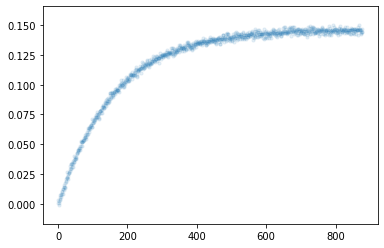

In [13]:
plt.scatter(rescaled_data[:,0],rescaled_data[:,1],s=10,alpha=0.1)

In [14]:
filedata = [str(dat[0])+'\t'+str(dat[1])+'\n' for dat in rescaled_data]

In [15]:
filedata

['0.0\t0.0034214839333150324\n',
 '0.878243512974052\t0.0005161167260630869\n',
 '1.756487025948104\t-0.0011280145792163352\n',
 '2.634730538922156\t0.0009538864290697681\n',
 '3.512974051896208\t0.0023261696702491013\n',
 '4.39121756487026\t0.003494648555273919\n',
 '5.269461077844312\t0.004481094469976422\n',
 '6.147704590818365\t0.007467892201033071\n',
 '7.025948103792416\t0.005499616475628339\n',
 '7.904191616766468\t0.005689830079676067\n',
 '8.78243512974052\t0.008097900852403328\n',
 '9.660678642714572\t0.00725700716099119\n',
 '10.538922155688624\t0.009827412001252084\n',
 '11.417165668662676\t0.008561495891839783\n',
 '12.29540918163673\t0.010643810303412896\n',
 '13.17365269461078\t0.008532269267058079\n',
 '14.051896207584832\t0.012203317122773288\n',
 '14.930139720558886\t0.01247546014924563\n',
 '15.808383233532936\t0.01207591272712151\n',
 '16.686626746506988\t0.013953361048519478\n',
 '17.56487025948104\t0.0140812565722137\n',
 '18.443113772455092\t0.01617232909613853\n

In [16]:
MOT2pd = open('MOT2pd.txt','w')
MOT2pd.write('points\n')
MOT2pd.writelines(filedata)
MOT2pd.close()